In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
...,...,...,...,...,...,...,...
2022-12-29 00:00:00-05:00,3805.449951,3858.189941,3805.449951,3849.280029,3003680000,0,0
2022-12-30 00:00:00-05:00,3829.060059,3839.850098,3800.340088,3839.500000,2979870000,0,0
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3959140000,0,0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2022-12-21 00:00:00-05:00', '2022-12-22 00:00:00-05:00',
               '2022-12-23 00:00:00-05:00', '2022-12-27 00:00:00-05:00',
               '2022-12-28 00:00:00-05:00', '2022-12-29 00:00:00-05:00',
               '2022-12-30 00:00:00-05:00', '2023-01-03 00:00:00-05:00',
               '2023-01-04 00:00:00-05:00', '2023-01-05 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23868, freq=None)

<AxesSubplot:xlabel='Date'>

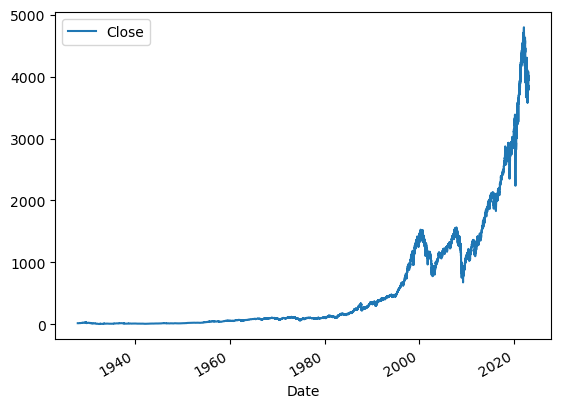

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2022-12-29 00:00:00-05:00,3805.449951,3858.189941,3805.449951,3849.280029,3003680000
2022-12-30 00:00:00-05:00,3829.060059,3839.850098,3800.340088,3839.500000,2979870000
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3959140000


In [9]:
sp500["Tommorow"] = sp500["Close"].shift(-1)

In [17]:
sp500["Target"] = (sp500["Tommorow"] > sp500["Close"]).astype(int)

In [18]:
sp500 = sp500.loc["1990-01-01":].copy()

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, min_samples_split=100, random_state = 1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=300, random_state=1)

In [20]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-12-29 00:00:00-05:00,3805.449951,3858.189941,3805.449951,3849.280029,3003680000,3839.500000,0
2022-12-30 00:00:00-05:00,3829.060059,3839.850098,3800.340088,3839.500000,2979870000,3824.139893,0
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3959140000,3852.969971,1


In [21]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [22]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [24]:
precision_score(test["Target"], preds)

0.3150684931506849

In [25]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

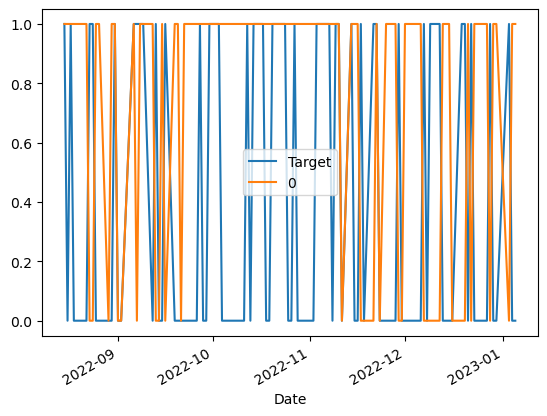

In [28]:
combined.plot()

In [29]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [32]:
def backtest(data, model, predictors, start=2500, step=250):
    #data might be sp500
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [33]:
predictions = backtest(sp500, model, predictors)

In [36]:
predictions["Predictions"].value_counts()

0    3358
1    2460
Name: Predictions, dtype: int64

In [37]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5276422764227642

In [38]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.53386
0    0.46614
Name: Target, dtype: float64

In [40]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [41]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-29 00:00:00-05:00,3805.449951,3858.189941,3805.449951,3849.280029,3003680000,3839.500000,0,1.008655,1.0,1.006139,2.0,0.998234,24.0,0.938952,108.0,1.059745,540.0
2022-12-30 00:00:00-05:00,3829.060059,3839.850098,3800.340088,3839.500000,2979870000,3824.139893,0,0.998728,1.0,1.002686,2.0,0.995456,24.0,0.937441,107.0,1.056691,540.0
2023-01-03 00:00:00-05:00,3853.290039,3878.459961,3794.330078,3824.139893,3959140000,3852.969971,1,0.997996,0.0,0.999755,1.0,0.991132,24.0,0.934576,107.0,1.052104,540.0


In [42]:
sp500 = sp500.dropna()

In [44]:
model = RandomForestClassifier(n_estimators=300, min_samples_split=70, random_state=1)

In [45]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [46]:
predictions = backtest(sp500, model, new_predictors)

In [48]:
predictions["Predictions"].value_counts()

0.0    4106
1.0     711
Name: Predictions, dtype: int64

In [49]:
precision_score(predictions["Target"], predictions["Predictions"])

0.569620253164557